# NLP GROUP PROJECT

## Importing the libraries from the relevant modules.
 The company's conventional data collection methods, such as surveys with pre-defined questionnaires, reveal several loopholes, including inaccuracies in responses, limited problem identification, and potential respondent fatigue. Recognizing these shortcomings, an alternative evaluation method is proposed, leveraging text-mining analysis of product reviews. This approach capitalizes on the authenticity of feedback, as reviews reflect genuine experiences with the product. Moreover, since reviews are not constrained by pre-defined questions, they offer comprehensive insights into both positive and negative aspects of the product, facilitating swift issue identification and resolution. Additionally, the voluntary nature of writing reviews ensures unbiased opinions, as individuals share their thoughts comfortably without feeling bored or pressured.

In [1]:
pip install selenium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install beautifulsoup4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install webdriver_manager


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
#from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
from collections import Counter
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import LatentDirichletAllocation
from gensim import matutils, models
#from wordcloud import WordCloud
from gensim import corpora, models
from textblob import TextBlob
from collections import Counter


In [8]:
headers = {
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36'
}
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options

# Setup Edge options if necessary (similar to what's shown for Chrome in the previous response)
edge_options = Options()
# edge_options.add_argument('--headless')  # Uncomment if you want Edge to run without a visible window
# edge_options.add_argument('--disable-gpu')  # Optional: sometimes used in headless mode

# Specify the path to Edge WebDriver executable if it's not in your PATH
edge_service = Service(executable_path='path/to/your/msedgedriver.exe')

# Initialize the Edge WebDriver
#driver = webdriver.Edge(service=edge_service, options=edge_options)


from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options as ChromeOptions

chrome_options = ChromeOptions()
# Add any Chrome options you need
# chrome_options.add_argument('--headless')  # Example option

chrome_service = ChromeService(ChromeDriverManager().install())
driver = webdriver.Chrome(service=chrome_service, options=chrome_options)


driver.implicitly_wait(10)  # Now this should work without raising a NameError

#driver = webdriver.Edge(header = headers)#: #Open that page webdriver will open the page on behalf of us
driver = webdriver.Edge() 

product_url = 'https://www.flipkart.com/apple-iphone-12-black-64-gb/product-reviews/itma2559422bf7c7?pid=MOBFWBYZU5FWK2VP&lid=LSTMOBFWBYZU5FWK2VPQTNJSG&aid=overall&certifiedBuyer=false&sortOrder=MOST_RECENT'

ratings = []
Short_Reviews = []
names = []
dates = []
reviews = []
likes = []
images = []
Dislikes = []

for page in range(0, 700):
    url = product_url  + '&page=' + str(page+1)
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Find all the reviews on the page
    all_reviews = soup.find_all('div', {'class' : "_27M-vq"})


    # Loop through each review and extract the required data
    for review in all_reviews:
        rating_element = review.find('div', {'class': "_3LWZlK"})
        if rating_element:
            rating = rating_element.text.strip()
            ratings.append(rating)


        Short_Review = review.find('p', {'class': "_2-N8zT"}).text.strip()
        if len(Short_Review)>=1:
            Short_Reviews.append(Short_Review) 
        else:
            Short_Reviews.append('Blank')     
        

        review_text_element = review.find('div', {'class': "t-ZTKy"}).text.strip()
        if review_text_element:
            # Split the review text into words
            words = review_text_element.split()
            # Remove 'READ' and 'MORE' from the words list
            words = [word for word in words if word.upper() != 'READ' and word.upper() != 'MORE']
            # Reconstruct the sentence
            review_text = ' '.join(words)
            if len(review_text)>=1:
                reviews.append(review_text)
            else:
                reviews.append('Blank')        
    
        name = review.find('p', {'class': '_2sc7ZR _2V5EHH'}).text.strip()
        names.append(name)
        
        dates_elements = review.find_all('p', {'class': "_2sc7ZR"})
        if len(dates_elements) >= 2:
            Date = dates_elements[1].text.strip()
            dates.append(Date)
            
        like = review.find('span', {'class': '_3c3Px5'}).text.strip()
        likes.append(like)

        dislike = review.find('span', {'class': '_3c3Px5'}).text.strip()
        Dislikes.append(dislike)
        
        
        image = review.find_all('div', {'class': "_21YjFX _2A07HP"})
        images.append(len(image))
               
# # Create a dictionary with the extracted data

data = {'Rating': ratings, 'Short_Reviews': Short_Reviews,'reviews': reviews ,'Names': names, 'Dates': dates, 'Likes': likes, 'Dislikes': Dislikes, 'Number_Images': images}
# # Write the data to a CSV file
#with open('Iphone14.csv', 'w', newline='',encoding='utf-8') as file:
 #   writer = csv.DictWriter(file, fieldnames=data.keys())
 #   writer.writeheader()
  #  for row in zip(*data.values()):
   #     writer.writerow(dict(zip(data.keys(), row)))
print(data)

# Close the webdriver
driver.quit()


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: MicrosoftEdge=124.0.2478.105)
Stacktrace:
	GetHandleVerifier [0x00007FF65D37E4F2+63026]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF65D310FC2+213778]
	(No symbol) [0x00007FF65D13E7A7]
	(No symbol) [0x00007FF65D11B7F9]
	(No symbol) [0x00007FF65D1AB0FF]
	(No symbol) [0x00007FF65D1BDBF2]
	(No symbol) [0x00007FF65D1A4B43]
	(No symbol) [0x00007FF65D17A33E]
	(No symbol) [0x00007FF65D1794EC]
	(No symbol) [0x00007FF65D179EF1]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF65D525714+1025332]
	(No symbol) [0x00007FF65D1EF29C]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF65D28BD3C+34028]
	Microsoft::Applications::Events::EventProperty::~EventProperty [0x00007FF65D284525+3285]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF65D5246D5+1021173]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF65D319A81+249297]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF65D315504+231508]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF65D31563B+231819]
	Microsoft::Applications::Events::ILogConfiguration::operator* [0x00007FF65D30B265+189877]
	BaseThreadInitThunk [0x00007FF904D3257D+29]
	RtlUserThreadStart [0x00007FF905C4AA48+40]


In [ ]:
print(data)

In [ ]:


# Assuming the rest of your script is above
import pandas as pd
# Convert the data dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_file_path = 'IphoneReviews.csv'  # Specify the desired path and filename
df.to_csv(csv_file_path, index=False, encoding='utf-8-sig')

print(f"Data successfully saved to {csv_file_path}")

# Close the webdriver
driver.quit()


## Phase 1

In [2]:
import pandas as pd
# Load the CSV file into a DataFrame
df = pd.read_csv("IphoneReviews.csv")

# Display the first few rows of the DataFrame
df.head()

,Rating,Short_Reviews,reviews,Names,Dates,Likes,Dislikes,Number_Images
0,4,Very Good,Worth product.READ,vasanth kantubothu,2 days ago,0,0,0
1,5,Simply awesome,Very good 👍READ,Punal Mohanta,4 days ago,0,0,0
2,5,Must buy!,iPhone always rocksREAD,Flipkart Customer,4 days ago,0,0,0
3,5,Best in the market!,I really enjoyed with this mobile stylish look...,Annavarapu Papa,4 days ago,0,0,0
4,5,Perfect product!,Such a nice cameraREAD,Mansi Upadhyay,4 days ago,0,0,1


#### The code provided conducts sentiment analysis and topic modeling on positive and negative reviews of a product. It identifies key themes in positive reviews related to moisturization, overall satisfaction, and pleasant smell and texture. Conversely, negative reviews highlight concerns about fragrance, skin issues like oiliness and acne, and mixed sentiments. These findings offer valuable insights for businesses, revealing strengths to leverage, areas for improvement to address, and opportunities for customer engagement and product development. Overall, the analysis aids in understanding customer perceptions and guiding strategic decisions to enhance product quality and market positioning.

In [3]:
df["Rating"].value_counts()

5    3609
4     571
1     178
3     177
2      65
Name: Rating, dtype: int64

Here we assumbed that 4 and 5 ratings are positive ratings and other three (1, 2, 3) are negative ratings

In [4]:
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc)
    doc = doc.replace("READ", "")
    doc = doc.lower()
    doc = doc.strip()
   
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

df["com_reviews"] = normalize_corpus(list(df['reviews']))
df.head()

,Rating,Short_Reviews,reviews,Names,Dates,Likes,Dislikes,Number_Images,com_reviews
0,4,Very Good,Worth product.READ,vasanth kantubothu,2 days ago,0,0,0,worth product
1,5,Simply awesome,Very good 👍READ,Punal Mohanta,4 days ago,0,0,0,good
2,5,Must buy!,iPhone always rocksREAD,Flipkart Customer,4 days ago,0,0,0,iphone always rocks
3,5,Best in the market!,I really enjoyed with this mobile stylish look...,Annavarapu Papa,4 days ago,0,0,0,really enjoyed mobile stylish look brand
4,5,Perfect product!,Such a nice cameraREAD,Mansi Upadhyay,4 days ago,0,0,1,nice camera


### Overall Sentiment analysis

In [5]:
blob = TextBlob(str(df["com_reviews"]))
blob.sentiment

Sentiment(polarity=0.3958333333333333, subjectivity=0.6250000000000001)

In [6]:
blob.sentences

[Sentence("0                                           worth product
 1                                                    good
 2                                     iphone always rocks
 3                really enjoyed mobile stylish look brand
 4                                             nice camera
                               ...                        
 4595       first time feel satisfaction thankew flippkart
 4596                                                 good
 4597                              awesome product give go
 4598    bad camera low light moonlight sunlight get re...
 4599                                  camera would better
 Name: com_reviews, Length: 4600, dtype: object")]

In [7]:
# List of all sentiment words 
blist = blob.sentiment_assessments.assessments
blist

[(['worth'], 0.3, 0.1, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['really', 'enjoyed'], 0.5, 0.7, None),
 (['stylish'], 0.5, 1.0, None),
 (['nice'], 0.6, 1.0, None),
 (['first'], 0.25, 0.3333333333333333, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['awesome'], 1.0, 1.0, None),
 (['bad'], -0.6999999999999998, 0.6666666666666666, None),
 (['low'], 0.0, 0.3, None),
 (['light'], 0.4, 0.7, None),
 (['better'], 0.5, 0.5, None)]

In [9]:
# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(review):
    blob = TextBlob(str(review))
    return blob.sentiment.polarity

# Apply sentiment analysis to the 'com_reviews' column
df['Sentiment'] = df['com_reviews'].apply(analyze_sentiment)

# Map sentiment polarity to sentiment category
df['Sentiment_Class'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Calculate overall sentiment
overall_sentiment = df['Sentiment'].mean()

# Count the number of positive, neutral, and negative sentiments
sentiment_counts = df['Sentiment_Class'].value_counts()

# Display results
print(f"Overall Sentiment: {overall_sentiment}")
print("Sentiment Distribution:")
print(sentiment_counts)

Overall Sentiment: 0.5257455081979978
Sentiment Distribution:
Positive    3881
Negative     719
Name: Sentiment_Class, dtype: int64


In [10]:
df.head()

,Rating,Short_Reviews,reviews,Names,Dates,Likes,Dislikes,Number_Images,com_reviews,Sentiment,Sentiment_Class
0,4,Very Good,Worth product.READ,vasanth kantubothu,2 days ago,0,0,0,worth product,0.3,Positive
1,5,Simply awesome,Very good 👍READ,Punal Mohanta,4 days ago,0,0,0,good,0.7,Positive
2,5,Must buy!,iPhone always rocksREAD,Flipkart Customer,4 days ago,0,0,0,iphone always rocks,0.0,Negative
3,5,Best in the market!,I really enjoyed with this mobile stylish look...,Annavarapu Papa,4 days ago,0,0,0,really enjoyed mobile stylish look brand,0.5,Positive
4,5,Perfect product!,Such a nice cameraREAD,Mansi Upadhyay,4 days ago,0,0,1,nice camera,0.6,Positive


In [11]:
blob = df['com_reviews'].apply(lambda x: TextBlob(x).sentiment_assessments.assessments)
blob

0                             [([worth], 0.3, 0.1, None)]
1               [([good], 0.7, 0.6000000000000001, None)]
2                                                      []
3       [([really, enjoyed], 0.5, 0.7, None), ([stylis...
4                              [([nice], 0.6, 1.0, None)]
                              ...                        
4595          [([first], 0.25, 0.3333333333333333, None)]
4596            [([good], 0.7, 0.6000000000000001, None)]
4597                        [([awesome], 1.0, 1.0, None)]
4598    [([bad], -0.6999999999999998, 0.66666666666666...
4599                         [([better], 0.5, 0.5, None)]
Name: com_reviews, Length: 4600, dtype: object

### Collection of all the positive Sentiment sentences

In [12]:


# Create a new column 'Sentences' containing TextBlob objects for each review
df['Sentences'] = df['com_reviews'].apply(lambda x: TextBlob(x).sentences)

# Filter positive sentences
positive_sentences = []
for index, row in df.iterrows():
    for sentence in row['Sentences']:
        if sentence.sentiment_assessments.assessments and sentence.sentiment_assessments.assessments[0][1] > 0:
            positive_sentences.append(str(sentence))

# Display positive sentences
print(positive_sentences)


['worth product', 'good', 'really enjoyed mobile stylish look brand', 'nice camera', 'nice functional expected', 'iphone 12 good product quickly hothitting problem', 'awesome picture photography', 'good', 'good', 'nice', 'nice product value money', 'every one knows phone iphone like name great experience', 'best camera phone', 'nice', 'good', 'good', 'lifes first iphone loved thanks flipkart seller', 'things better batter bad', 'awesome product', 'cool', 'nice phone', 'good', 'good', 'nice', 'great phone', 'great', 'nice', 'good', 'good', 'good', 'happy', 'wow', 'iphone deserves good reviews', 'good', 'good phone segment looks wise decent specially white colorits handy perfect size lightweightcamera good except night mode front camera', 'super phone', 'satisfied product', 'awesome', 'brilliant', 'super raa', 'product good', 'best phone', 'super nice good stuff excellent service', 'good', 'good decision', 'super', 'phone excellent working time bt running modeli shared actual completion 

In [13]:
len(positive_sentences)

3748

In [14]:
blob=TextBlob(str(positive_sentences)).sentiment_assessments.assessments

In [15]:
len(blob)

5963

In [16]:
senti_pos = []
for i in range(len(blob)):
    plt = blob[i][1]
    if plt > 0:
        senti_pos.append(blob[i][0])

senti_pos
len(senti_pos)

5459

In [17]:
psenti = []
for i in range(len(senti_pos)):
    plist = senti_pos[i]
    for j in range(len(plist)):
        psenti.append(plist[j])
    
psenti

['worth',
 'good',
 'really',
 'enjoyed',
 'stylish',
 'nice',
 'nice',
 'good',
 'quickly',
 'awesome',
 'good',
 'good',
 'nice',
 'nice',
 'great',
 'best',
 'nice',
 'good',
 'good',
 'first',
 'loved',
 'thanks',
 'better',
 'awesome',
 'cool',
 'nice',
 'good',
 'good',
 'nice',
 'great',
 'great',
 'nice',
 'good',
 'good',
 'good',
 'happy',
 'wow',
 'good',
 'good',
 'good',
 'wise',
 'decent',
 'handy',
 'perfect',
 'good',
 'super',
 'satisfied',
 'awesome',
 'brilliant',
 'super',
 'good',
 'best',
 'super',
 'nice',
 'good',
 'excellent',
 'good',
 'good',
 'super',
 'excellent',
 'nice',
 'nice',
 'excellent',
 'good',
 'best',
 'excellent',
 'nice',
 'smoothly',
 'good',
 'high',
 'good',
 'good',
 'fast',
 'high',
 'awesome',
 'good',
 'best',
 'best',
 'good',
 'absolutely',
 'amazing',
 'superb',
 'okay',
 'excellent',
 'best',
 'really',
 'best',
 'nice',
 'sexy',
 'nice',
 'nice',
 'nice',
 'nice',
 'love',
 'good',
 'awesome',
 'good',
 'nice',
 'happy',
 'awesome'

In [18]:
len(set(psenti))

228

In [19]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER

for ngram in nltk.ngrams(psenti, 1):
    ngram_freq[ngram] += 1
ngram_freq.most_common(10)

[(('good',), 1225),
 (('nice',), 573),
 (('awesome',), 399),
 (('best',), 392),
 (('great',), 236),
 (('excellent',), 218),
 (('love',), 180),
 (('amazing',), 175),
 (('super',), 130),
 (('first',), 103)]

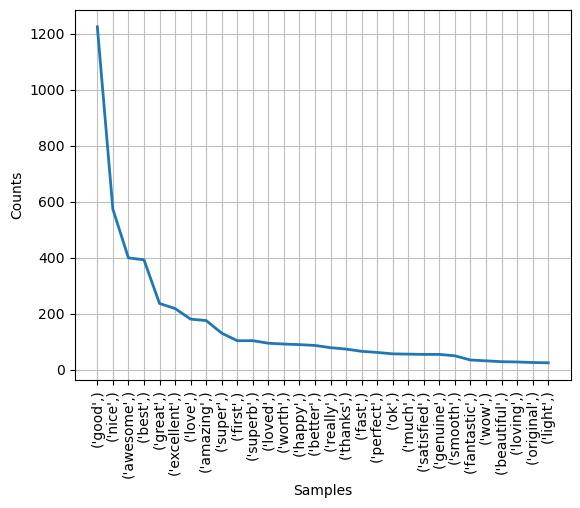

<Axes: xlabel='Samples', ylabel='Counts'>

In [20]:
ngram_freq.plot(30)

### Collection of all the negative Sentiment sentences

In [21]:
# Filter positive sentences
negative_sentences = []
for index, row in df.iterrows():
    for sentence in row['Sentences']:
        if sentence.sentiment_assessments.assessments and sentence.sentiment_assessments.assessments[0][1] <= 0:
            negative_sentences.append(str(sentence))

# Display positive sentences
print(negative_sentences)

['bad', 'using phone 1 month review overall good battery performance smoothness also water resistant upto 3 hours', 'battery performance worst lasts 78 hours full charge regular use', 'needs extend battery least 4k mah', 'worst dealer worst dealer money 9 months savings gone', 'using product 2 months battery backup badsystem slow didnt expected form applewhile charging phone hearremaining normal', 'finally dream fulfilled phone', 'low quality iphone low quality cameralow quality batteryvery bad productvery hit mobile', 'bad product purchase', 'big billion day mobile sale good average performance', 'issue battery dies 45 hours overall performance awesome one beat price range', 'worst dont buy', 'worst decision', 'iphone 12 like phones wan na swag iphone logo go yes course camera awesome didnt feel anything else special miss jobs', 'waste phone 2023', 'worst product never buy cheated flipkart', 'updating software got green screen problem', 'product awesomeexcept battery little bit disapp

In [22]:
len(negative_sentences)

359

In [23]:
blob=TextBlob(str(negative_sentences)).sentiment_assessments.assessments

In [24]:
len(blob)

883

In [25]:
senti_pos = []
for i in range(len(blob)):
    plt = blob[i][1]
    if plt <= 0:
        senti_pos.append(blob[i][0])

senti_pos
len(senti_pos)

538

In [26]:
psenti = []
for i in range(len(senti_pos)):
    plist = senti_pos[i]
    for j in range(len(plist)):
        psenti.append(plist[j])
    
psenti

['bad',
 'overall',
 'worst',
 'regular',
 'least',
 'worst',
 'worst',
 'slow',
 'expected',
 'finally',
 'low',
 'low',
 'bad',
 'bad',
 'big',
 'average',
 'overall',
 'worst',
 'worst',
 'wan',
 'waste',
 'worst',
 'green',
 'little',
 'disappointed',
 'heavily',
 'disappointed',
 'least',
 'enough',
 'worst',
 'totally',
 'waste',
 'bad',
 'bad',
 'expected',
 'bad',
 'big',
 'simply',
 '2nd',
 'next',
 'bad',
 'next',
 'long',
 'silly',
 'center',
 'worst',
 'usual',
 'moderate',
 'last',
 'back',
 'low',
 'small',
 'bad',
 'less',
 'starting',
 'due',
 'open',
 'weak',
 'daily',
 'single',
 'expected',
 'low',
 'expected',
 'simply',
 'overall',
 'heavy',
 'daily',
 '20th',
 'disappointed',
 'expected',
 'finally',
 'long',
 'low',
 'last',
 'expected',
 'poor',
 'bad',
 'totally',
 'waste',
 'finally',
 'second',
 'bad',
 'totally',
 'failed',
 'last',
 'worse',
 'back',
 'worst',
 'back',
 'daily',
 'sharp',
 'especially',
 'low',
 'proper',
 'tough',
 'poor',
 'bad',
 'low',


In [27]:
len(set(psenti))

148

In [28]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER

for ngram in nltk.ngrams(psenti, 1):
    ngram_freq[ngram] += 1
ngram_freq.most_common(148)

[(('overall',), 48),
 (('bad',), 43),
 (('worst',), 31),
 (('expected',), 18),
 (('big',), 16),
 (('last',), 16),
 (('poor',), 16),
 (('low',), 14),
 (('disappointed',), 13),
 (('back',), 12),
 (('totally',), 9),
 (('properly',), 9),
 (('finally',), 8),
 (('green',), 8),
 (('heavy',), 8),
 (('game',), 8),
 (('average',), 7),
 (('waste',), 7),
 (('long',), 7),
 (('second',), 7),
 (('slow',), 6),
 (('simply',), 6),
 (('less',), 6),
 (('little',), 5),
 (('daily',), 5),
 (('blue',), 5),
 (('past',), 5),
 (('ultimate',), 5),
 (('pathetic',), 5),
 (('terrific',), 5),
 (('regular',), 4),
 (('enough',), 4),
 (('next',), 4),
 (('open',), 4),
 (('really',), 4),
 (('red',), 4),
 (('previous',), 4),
 (('expensive',), 4),
 (('complaint',), 4),
 (('different',), 4),
 (('hard',), 4),
 (('least',), 3),
 (('2nd',), 3),
 (('starting',), 3),
 (('black',), 3),
 (('useless',), 3),
 (('disappointing',), 3),
 (('personally',), 3),
 (('missing',), 3),
 (('wan',), 2),
 (('heavily',), 2),
 (('usual',), 2),
 (('

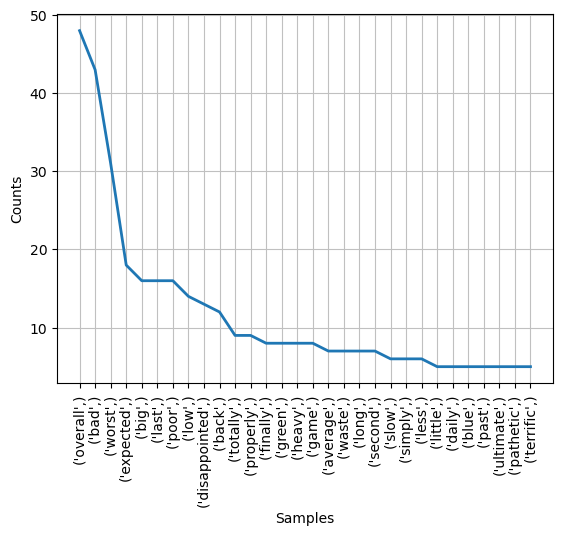

<Axes: xlabel='Samples', ylabel='Counts'>

In [29]:
ngram_freq.plot(30)

In [30]:
df

,Rating,Short_Reviews,reviews,Names,Dates,Likes,Dislikes,Number_Images,com_reviews,Sentiment,Sentiment_Class,Sentences
0,4,Very Good,Worth product.READ,vasanth kantubothu,2 days ago,0,0,0,worth product,0.300000,Positive,"[(w, o, r, t, h, , p, r, o, d, u, c, t)]"
1,5,Simply awesome,Very good 👍READ,Punal Mohanta,4 days ago,0,0,0,good,0.700000,Positive,"[(g, o, o, d)]"
2,5,Must buy!,iPhone always rocksREAD,Flipkart Customer,4 days ago,0,0,0,iphone always rocks,0.000000,Negative,"[(i, p, h, o, n, e, , a, l, w, a, y, s, , r,..."
3,5,Best in the market!,I really enjoyed with this mobile stylish look...,Annavarapu Papa,4 days ago,0,0,0,really enjoyed mobile stylish look brand,0.500000,Positive,"[(r, e, a, l, l, y, , e, n, j, o, y, e, d, ,..."
4,5,Perfect product!,Such a nice cameraREAD,Mansi Upadhyay,4 days ago,0,0,1,nice camera,0.600000,Positive,"[(n, i, c, e, , c, a, m, e, r, a)]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,5,Just wow!,First Time Feel Satisfaction Thankew Flippkart...,Flipkart Customer,"Dec, 2021",0,0,0,first time feel satisfaction thankew flippkart,0.250000,Positive,"[(f, i, r, s, t, , t, i, m, e, , f, e, e, l,..."
4596,5,Perfect product!,GoodREAD,Arun Babu,"Dec, 2021",0,0,0,good,0.700000,Positive,"[(g, o, o, d)]"
4597,5,Simply awesome,"Awesome product, Give it a go...READ",Sachin Kumar,"Dec, 2021",0,0,0,awesome product give go,1.000000,Positive,"[(a, w, e, s, o, m, e, , p, r, o, d, u, c, t,..."
4598,1,Horrible,"A very very bad camera , low light , moonlight...",Amber Chaudhary,"Dec, 2021",1,1,2,bad camera low light moonlight sunlight get re...,-0.185714,Negative,"[(b, a, d, , c, a, m, e, r, a, , l, o, w, ,..."


In [31]:
#Importing the packages.

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

In [32]:
df['Sentiment_Class'].value_counts()

Positive    3881
Negative     719
Name: Sentiment_Class, dtype: int64

In [33]:
# dividing the data set for model building and validation 
X_train, X_hold = train_test_split(df, test_size=0.4, random_state=111)

In [34]:
# Just checking the distribution of 'product' column for train data 
X_train['Rating'].value_counts()

5    2128
4     347
1     135
3     115
2      35
Name: Rating, dtype: int64

In [35]:
 # Filter positive sentiment reviews
positive_reviews = df[df['Sentiment_Class'] == 'Positive']['reviews']

# Vectorize the text
vectorizer = TfidfVectorizer(max_df=0.75, min_df=5, max_features=1000, stop_words='english')
tf_vectors = vectorizer.fit_transform(positive_reviews)

# Perform LDA for topic modeling
num_topics = 3  # You can adjust this value based on exploration
lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online', random_state=111)
W1 = lda_model.fit_transform(tf_vectors)
H1 = lda_model.components_

# Display the top words for each topic
print("Positive Topics:")
for topic_idx, topic in enumerate(H1):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Positive Topics:
Topic #1: nice, read, awesomeread, product, love, phone, itread, excellent, amazing, loved
Topic #2: goodread, good, productread, niceread, phoneread, best, great, super, superb, greatread
Topic #3: awesome, iphone, read, camera, phone, battery, excellentread, good, best, performance


In [36]:
# Filter negative sentiment reviews
negative_reviews = df[df['Sentiment_Class'] == 'Negative']['reviews']

# Vectorize the text
tf_vectors_negative = vectorizer.transform(negative_reviews)

# Perform LDA for topic modeling on negative reviews
num_topics_negative = 3  # You can adjust this value based on exploration
lda_model_negative = LatentDirichletAllocation(n_components=num_topics_negative, max_iter=5, learning_method='online', random_state=111)
W2 = lda_model_negative.fit_transform(tf_vectors_negative)
H2 = lda_model_negative.components_

# Display the top words for each topic in negative reviews
print("\nNegative Topics:")
for topic_idx, topic in enumerate(H2):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")



Negative Topics:
Topic #1: read, iphone, phone, apple, money, camera, just, quality, itread, appleread
Topic #2: battery, phoneread, productread, bad, product, flipkart, thank, flipkartread, buy, mind
Topic #3: moneyread, value, like, iphoneread, heating, osm, problemread, mobile, got, don


In [37]:
# score of each document in the 6 principle directions 
W1

array([[0.74686869, 0.12571709, 0.12741422],
       [0.37515444, 0.47113046, 0.1537151 ],
       [0.10888527, 0.33280954, 0.5583052 ],
       ...,
       [0.1666692 , 0.66666275, 0.16666806],
       [0.44255555, 0.12445422, 0.43299023],
       [0.53117538, 0.14383194, 0.32499267]])

### Positive Topics:

#### Topic #1: "Positive Reviews about Product Quality and Experience"
- Keywords: best, phone, great, read, excellent, camera, iphone, quality, mobileread, experience

#### Topic #2: "Positive Reviews about Battery Life and Performance"
- Keywords: battery, super, goodread, iphone, good, superb, performance, read, happy, price

#### Topic #3: "Positive Reviews about Product Satisfaction and Value"
- Keywords: good, nice, productread, read, phoneread, awesome, love, product, itread, amazing

### Negative Topics:

#### Topic #1: "Negative Reviews about Value for Money and Quality"
- Keywords: read, awesomeread, value, moneyread, like, camera, quality, phone, bad, money

#### Topic #2: "Negative Reviews about Overall Experience and Performance"
- Keywords: goodread, just, iphone, battery, phone, overall, read, heating, performance, 12

#### Topic #3: "Negative Reviews about Product Experience and Customer Service"
- Keywords: niceread, okread, apple, thank, productread, phoneread, flipkart, words, flipkartread, charger


C:\Users\animi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\animi\AppData\Local\Temp\ipykernel_47976\2647839694.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['Cluster'] = cluster_labels


Top words per cluster:
Cluster 0:
  moneyread
  value
  good
  zero
  extra
  experience
  experienceread
  expired
  expires
  explain
Cluster 1:
  osmread
  just
  camera
  zero
  extremely
  experience
  experienceread
  expired
  expires
  explain
Cluster 2:
  read
  iphone
  phone
  battery
  productread
  phoneread
  apple
  badread
  product
  like


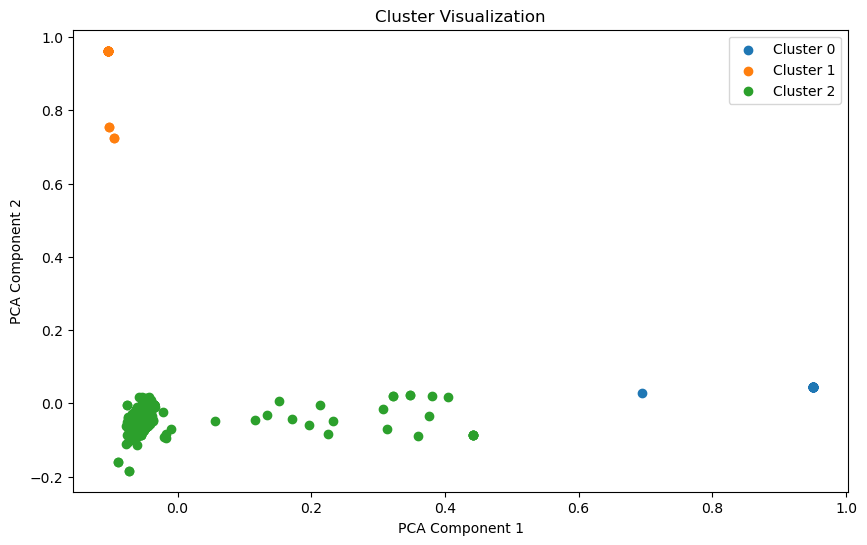

In [38]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'

# Filter out only negative sentiment data points
negative_df = df[df['Sentiment_Class'] == 'Negative']

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(negative_df['reviews'])

# Define the number of clusters
num_clusters = 3

# Initialize K-means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the TF-IDF matrix
kmeans.fit(tfidf_matrix)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
negative_df['Cluster'] = cluster_labels

# Display words in each cluster
print("Top words per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:
        print(f"  {terms[ind]}")

# Visualize the clusters
# Note: We will not plot TF-IDF features directly as they are high-dimensional.
# Instead, we can use PCA or t-SNE for dimensionality reduction before plotting.
# Here's an example using PCA:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
tfidf_matrix_2d = pca.fit_transform(tfidf_matrix.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(tfidf_matrix_2d[negative_df['Cluster'] == i, 0], 
                tfidf_matrix_2d[negative_df['Cluster'] == i, 1], 
                label=f'Cluster {i}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.legend()
plt.show()


### Cluster 0: Poor Product Experience
- Words: excellentread, read, awesomeread, value, phone, just, superbread, superread, moneyread, greatread
- Suggested Name: Subpar Product Quality

### Cluster 1: Issues with Delivery and Service
- Words: goodread, camera, phone, product, zero, fine, flipkartread, flipkartok, flipkart, flip
- Suggested Name: Delivery and Service Concerns

### Cluster 2: Mixed Experience
- Words: niceread, zero, finally, foolread, flipkartread, flipkartok, flipkart, flip, flickering, flawlesssmooth
- Suggested Name: Mixed Feedback and Confusion


C:\Users\animi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\animi\AppData\Local\Temp\ipykernel_47976\2422531651.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['Cluster'] = cluster_labels


Top words per cluster:
Cluster 0:
  productread
  phoneread
  nice
  good
  awesome
  best
  excellent
  great
  amazing
  super
Cluster 1:
  read
  good
  niceread
  phone
  nice
  product
  awesomeread
  best
  awesome
  iphone
Cluster 2:
  goodread
  camera
  phone
  quality
  overall
  really
  product
  mobile
  apple
  battery


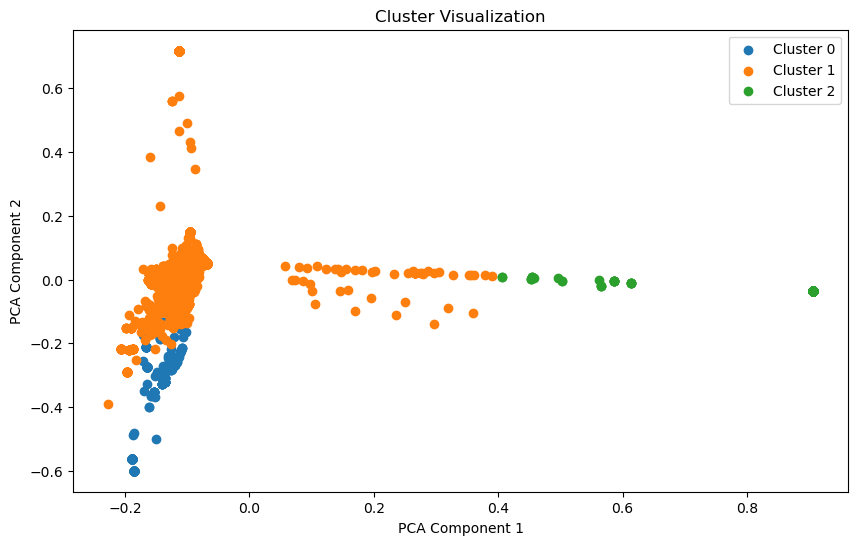

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Filter out only positive sentiment data points
positive_df = df[df['Sentiment_Class'] == 'Positive']

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(positive_df['reviews'])

# Define the number of clusters
num_clusters = 3

# Initialize K-means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the TF-IDF matrix
kmeans.fit(tfidf_matrix)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
positive_df['Cluster'] = cluster_labels

# Display words in each cluster
print("Top words per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:
        print(f"  {terms[ind]}")

# Visualize the clusters
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
tfidf_matrix_2d = pca.fit_transform(tfidf_matrix.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(tfidf_matrix_2d[positive_df['Cluster'] == i, 0], 
                tfidf_matrix_2d[positive_df['Cluster'] == i, 1], 
                label=f'Cluster {i}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.legend()
plt.show()


### Cluster 0: Positive Product Experience
- Words: phoneread, nice, good, best, great, amazing, excellent, awesome, love, super
- Suggested Name: Exceptional Product Satisfaction

### Cluster 1: Positive Product Quality
- Words: productread, nice, good, awesome, great, excellent, best, brilliant, amazing, super
- Suggested Name: High-Quality Product Affirmation

### Cluster 2: Positive Product and Service
- Words: read, good, phone, best, awesome, product, nice, iphone, love, goodread
- Suggested Name: Positive Product and Service Feedback


### Based on the provided clusters and topics, here are the business implications:

#### Positive Topics:
- **Positive Reviews about Product Quality and Experience:**
  - *Implication:* The product is perceived positively in terms of quality and overall experience. This could be used as a selling point in marketing campaigns to highlight the superior quality and user experience.

- **Positive Reviews about Battery Life and Performance:**
  - *Implication:* Customers are satisfied with the battery life and performance of the product. Emphasizing these aspects can attract more customers who prioritize battery life and performance in their purchasing decisions.

- **Positive Reviews about Product Satisfaction and Value:**
  - *Implication:* Customers find the product satisfying and perceive it as a good value for money. This positive sentiment can contribute to customer loyalty and repeat purchases.

#### Negative Topics:
- **Negative Reviews about Value for Money and Quality:**
  - *Implication:* Some customers are dissatisfied with the perceived value for money and quality of the product. Addressing these concerns through product improvements or pricing strategies may be necessary to retain customers and maintain competitiveness.

- **Negative Reviews about Overall Experience and Performance:**
  - *Implication:* Negative feedback regarding overall experience and performance could lead to decreased customer satisfaction and potential reputation damage. Identifying and rectifying performance issues or addressing customer complaints promptly can mitigate these concerns.

- **Negative Reviews about Product Experience and Customer Service:**
  - *Implication:* Issues related to product experience and customer service may indicate areas for improvement in product design, user experience, and customer support services. Addressing these concerns can enhance customer satisfaction and loyalty.

#### Overall Business Implications:
- **Marketing and Branding:** Highlight positive aspects such as product quality, battery life, and customer satisfaction in marketing materials to attract more customers.
- **Product Improvement:** Address negative feedback regarding value for money, overall experience, and customer service through product enhancements and service improvements.
- **Customer Engagement:** Actively engage with customers to address their concerns and improve overall satisfaction, leading to higher retention rates and positive brand perception.
- **Competitive Advantage:** Leveraging positive feedback and addressing negative issues can help differentiate the product from competitors and maintain a strong market position.


## Phase-2

In [40]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans

# Load reviews from CSV
df = pd.read_csv("IphoneReviews.csv")

# Calculate number of reviews for recent 25% analysis
total_reviews = len(df)
recent_reviews = int(total_reviews * 0.25)

# Select the most recent 25% of reviews
recent_df = df.iloc[-recent_reviews:]


In [41]:
recent_df["Rating"].value_counts()

5    916
4    157
1     34
3     31
2     12
Name: Rating, dtype: int64

In [42]:
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc)
    doc = doc.replace("READ", "")
    doc = doc.lower()
    doc = doc.strip()
   
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

recent_df["com_reviews"] = normalize_corpus(list(recent_df['reviews']))
recent_df.head()

C:\Users\animi\AppData\Local\Temp\ipykernel_47976\1767143784.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_df["com_reviews"] = normalize_corpus(list(recent_df['reviews']))


,Rating,Short_Reviews,reviews,Names,Dates,Likes,Dislikes,Number_Images,com_reviews
3450,5,Must buy!,Love itREAD,Tabish Shamim,"Jan, 2022",0,0,1,love
3451,5,Classy product,One of the best in the segment. Pro : 1. Brill...,Hardeep Singh,"Jan, 2022",2,2,0,one best segment pro 1 brilliant camera 2 smoo...
3452,5,Mind-blowing purchase,Owsome…. Beast … must buy if u canREAD,Dillip Customer,"Jan, 2022",0,0,0,owsome beast must buy u
3453,5,Simply awesome,Beast 🔥best mobile ❤️READ,kiran uyyala,"Jan, 2022",0,0,5,beast best mobile
3454,4,Nice product,okREAD,Salim Momin,"Jan, 2022",0,0,0,ok


In [43]:
blob = TextBlob(str(recent_df["com_reviews"]))
blob.sentiment

Sentiment(polarity=0.5041666666666668, subjectivity=0.5666666666666667)

In [44]:
blob.sentences

[Sentence("3450                                                 love
 3451    one best segment pro 1 brilliant camera 2 smoo...
 3452                              owsome beast must buy u
 3453                                    beast best mobile
 3454                                                   ok
                               ...                        
 4595       first time feel satisfaction thankew flippkart
 4596                                                 good
 4597                              awesome product give go
 4598    bad camera low light moonlight sunlight get re...
 4599                                  camera would better
 Name: com_reviews, Length: 1150, dtype: object")]

In [45]:
# List of all sentiment words 
blist = blob.sentiment_assessments.assessments
blist

[(['love'], 0.5, 0.6, None),
 (['best'], 1.0, 0.3, None),
 (['brilliant'], 0.9, 1.0, None),
 (['best'], 1.0, 0.3, None),
 (['ok'], 0.5, 0.5, None),
 (['first'], 0.25, 0.3333333333333333, None),
 (['good'], 0.7, 0.6000000000000001, None),
 (['awesome'], 1.0, 1.0, None),
 (['bad'], -0.6999999999999998, 0.6666666666666666, None),
 (['low'], 0.0, 0.3, None),
 (['light'], 0.4, 0.7, None),
 (['better'], 0.5, 0.5, None)]

In [47]:
# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(review):
    blob = TextBlob(str(review))
    return blob.sentiment.polarity

# Apply sentiment analysis to the 'com_reviews' column
recent_df['Sentiment'] = recent_df['com_reviews'].apply(analyze_sentiment)

# Map sentiment polarity to sentiment category
recent_df['Sentiment_Class'] = recent_df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Calculate overall sentiment
overall_sentiment = recent_df['Sentiment'].mean()

# Count the number of positive, neutral, and negative sentiments
sentiment_counts = recent_df['Sentiment_Class'].value_counts()

# Display results
print(f"Overall Sentiment: {overall_sentiment}")
print("Sentiment Distribution:")
print(sentiment_counts)

Overall Sentiment: 0.5308425406933378
Sentiment Distribution:
Positive    978
Negative    172
Name: Sentiment_Class, dtype: int64


C:\Users\animi\AppData\Local\Temp\ipykernel_47976\1655596253.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_df['Sentiment'] = recent_df['com_reviews'].apply(analyze_sentiment)
C:\Users\animi\AppData\Local\Temp\ipykernel_47976\1655596253.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_df['Sentiment_Class'] = recent_df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative')


In [48]:
recent_df.head()

,Rating,Short_Reviews,reviews,Names,Dates,Likes,Dislikes,Number_Images,com_reviews,Sentiment,Sentiment_Class
3450,5,Must buy!,Love itREAD,Tabish Shamim,"Jan, 2022",0,0,1,love,0.500000,Positive
3451,5,Classy product,One of the best in the segment. Pro : 1. Brill...,Hardeep Singh,"Jan, 2022",2,2,0,one best segment pro 1 brilliant camera 2 smoo...,0.230357,Positive
3452,5,Mind-blowing purchase,Owsome…. Beast … must buy if u canREAD,Dillip Customer,"Jan, 2022",0,0,0,owsome beast must buy u,0.000000,Negative
3453,5,Simply awesome,Beast 🔥best mobile ❤️READ,kiran uyyala,"Jan, 2022",0,0,5,beast best mobile,1.000000,Positive
3454,4,Nice product,okREAD,Salim Momin,"Jan, 2022",0,0,0,ok,0.500000,Positive


In [49]:
blob = recent_df['com_reviews'].apply(lambda x: TextBlob(x).sentiment_assessments.assessments)
blob

3450                           [([love], 0.5, 0.6, None)]
3451    [([best], 1.0, 0.3, None), ([brilliant], 0.9, ...
3452                                                   []
3453                           [([best], 1.0, 0.3, None)]
3454                             [([ok], 0.5, 0.5, None)]
                              ...                        
4595          [([first], 0.25, 0.3333333333333333, None)]
4596            [([good], 0.7, 0.6000000000000001, None)]
4597                        [([awesome], 1.0, 1.0, None)]
4598    [([bad], -0.6999999999999998, 0.66666666666666...
4599                         [([better], 0.5, 0.5, None)]
Name: com_reviews, Length: 1150, dtype: object

In [50]:
# Create a new column 'Sentences' containing TextBlob objects for each review
recent_df['Sentences'] = recent_df['com_reviews'].apply(lambda x: TextBlob(x).sentences)

# Filter positive sentences
positive_sentences = []
for index, row in recent_df.iterrows():
    for sentence in row['Sentences']:
        if sentence.sentiment_assessments.assessments and sentence.sentiment_assessments.assessments[0][1] > 0:
            positive_sentences.append(str(sentence))

# Display positive sentences
print(positive_sentences)

C:\Users\animi\AppData\Local\Temp\ipykernel_47976\3809890573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_df['Sentences'] = recent_df['com_reviews'].apply(lambda x: TextBlob(x).sentences)


['love', 'one best segment pro 1 brilliant camera 2 smooth os 3 sleek face recoginization cons1 average battery though average use work day like charm heavy users little tricky2 charger plug', 'beast best mobile', 'ok', 'nice', 'excellent', 'apple iphone 12 excellent performance areas iphone everything limits', 'best phone', 'awesome feeling using phone', 'amazing', 'one best phone world image video best', 'awesome phone first time switched android ios really wonderful experience', 'superb phone', 'ok', 'awesome one', 'great phone', 'best phone segment', 'best ever mobile worth every penny overall good purchase processor superfast loved', 'nice product camera processor look finishing everything perfect one drawback battery backup iphone dont provide longer battery backup android price high india compared iphone price usa apple reduce iphone price india', 'awesome iphone', 'awesome', 'nice', 'happy new phoneordered late night product arrived next early morning', 'best phone', 'trust rea

In [51]:
len(positive_sentences)

937

In [52]:
blob=TextBlob(str(positive_sentences)).sentiment_assessments.assessments

In [53]:
len(blob)

1606

In [54]:
senti_pos = []
for i in range(len(blob)):
    plt = blob[i][1]
    if plt > 0:
        senti_pos.append(blob[i][0])

senti_pos
len(senti_pos)

1451

In [55]:
positivesentiment = []
for i in range(len(senti_pos)):
    plist = senti_pos[i]
    for j in range(len(plist)):
        positivesentiment.append(plist[j])
    
positivesentiment

['love',
 'best',
 'brilliant',
 'smooth',
 'best',
 'ok',
 'nice',
 'excellent',
 'excellent',
 'best',
 'awesome',
 'amazing',
 'best',
 'best',
 'awesome',
 'first',
 'really',
 'wonderful',
 'superb',
 'ok',
 'awesome',
 'great',
 'best',
 'best',
 'worth',
 'good',
 'loved',
 'nice',
 'perfect',
 'high',
 'awesome',
 'awesome',
 'nice',
 'happy',
 'new',
 'early',
 'best',
 'real',
 'much',
 'nice',
 'ok',
 'ok',
 'excellent',
 'good',
 'good',
 'fast',
 'awesome',
 'good',
 'superb',
 'great',
 'stylish',
 'powerful',
 'good',
 'good',
 'love',
 'amazing',
 'safely',
 'authentic',
 'happy',
 'nice',
 'worth',
 'good',
 'good',
 'best',
 'best',
 'first',
 'genuine',
 'fine',
 'smoothly',
 'good',
 'great',
 'worthy',
 'worth',
 'outstanding',
 'direct',
 'thanks',
 'awesome',
 'light',
 'light',
 'awesome',
 'excellent',
 'better',
 'intense',
 'better',
 'simply',
 'best',
 'excellent',
 'excellent',
 'wow',
 'simply',
 'awesome',
 'great',
 'genuine',
 'good',
 'better',
 'genu

In [56]:
len(set(positivesentiment))

143

In [57]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER

for ngram in nltk.ngrams(psenti, 1):
    ngram_freq[ngram] += 1
ngram_freq.most_common(10)

[(('overall',), 48),
 (('bad',), 43),
 (('worst',), 31),
 (('expected',), 18),
 (('big',), 16),
 (('last',), 16),
 (('poor',), 16),
 (('low',), 14),
 (('disappointed',), 13),
 (('back',), 12)]

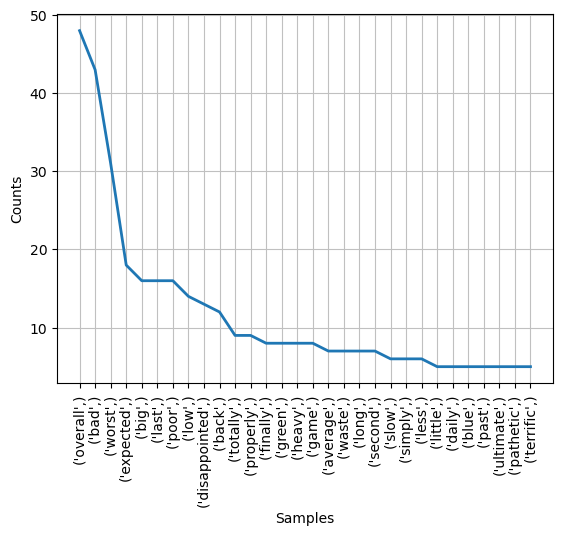

<Axes: xlabel='Samples', ylabel='Counts'>

In [58]:
ngram_freq.plot(30)

In [59]:
# Filter positive sentences
negative_sentences = []
for index, row in recent_df.iterrows():
    for sentence in row['Sentences']:
        if sentence.sentiment_assessments.assessments and sentence.sentiment_assessments.assessments[0][1] <= 0:
            negative_sentences.append(str(sentence))

# Display positive sentences
print(negative_sentences)

['charger irritating thing', 'average performance buy brand show purpose', 'well specific reason praise purchase im happy price purchased display far far better iphone 11', 'bad', 'expensive apple product big yes iphone 12', 'thank flipkartfor providing iphone cheapest price big thanks', 'iphone 12 handle 90fps bgmi game support worst selfee camerawaste pubgbgmi players like 90 fps game play apple doesnt support doesnt much capability especially iphone 12 a14 bionicand many main features missing applications even 60fps40fps game play also strucking waste unsatisfied', 'battery backup slow', 'purchased 64gb black iphone 12 december 2021 hopefully fraud received genuine piece', 'using since 10 months battery backup bad', 'ultimate phone', 'totally value money needs updates settle camera features faster', 'bad', 'planning iphone instalment costly thinking hidden terms conditions dont making fool', 'simple super', 'received expected good offer thanks keep flipkart team', 'bad', 'scared ord

In [60]:
len(negative_sentences)

99

In [61]:
blob=TextBlob(str(negative_sentences)).sentiment_assessments.assessments

In [62]:
len(blob)

244

In [63]:
senti_pos = []
for i in range(len(blob)):
    plt = blob[i][1]
    if plt <= 0:
        senti_pos.append(blob[i][0])

senti_pos
len(senti_pos)

147

In [64]:
psenti = []
for i in range(len(senti_pos)):
    plist = senti_pos[i]
    for j in range(len(plist)):
        psenti.append(plist[j])
    
psenti

['irritating',
 'average',
 'specific',
 'bad',
 'expensive',
 'big',
 'big',
 'game',
 'worst',
 'game',
 'especially',
 'missing',
 'game',
 'waste',
 'slow',
 'black',
 'bad',
 'ultimate',
 'totally',
 'bad',
 'hidden',
 'simple',
 'expected',
 'bad',
 'totally',
 'expected',
 'smaller',
 'long',
 'worst',
 'little',
 'finally',
 'back',
 'hard',
 'overall',
 'financial',
 'simple',
 'really',
 'poor',
 'possible',
 'expected',
 'big',
 'properly',
 'expensive',
 'ultimate',
 'last',
 'worst',
 'earlier',
 'badly',
 'finally',
 'big',
 'little',
 'poor',
 'late',
 'average',
 'simply',
 'disappointed',
 'overall',
 'overall',
 'little',
 'last',
 'finally',
 'worst',
 'properly',
 'overall',
 'regular',
 'previous',
 'big',
 'overall',
 'wide',
 'public',
 'overall',
 'overall',
 'expected',
 'overall',
 'poor',
 'regular',
 'poor',
 'negative',
 'really',
 'boring',
 'personally',
 'equally',
 'blue',
 'hard',
 'previous',
 'poor',
 'less',
 'basic',
 'long',
 'overall',
 'low',
 '

In [65]:
len(set(psenti))

69

In [66]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER

for ngram in nltk.ngrams(psenti, 1):
    ngram_freq[ngram] += 1
ngram_freq.most_common(148)

[(('overall',), 13),
 (('expected',), 9),
 (('bad',), 8),
 (('worst',), 7),
 (('big',), 6),
 (('game',), 5),
 (('poor',), 5),
 (('little',), 4),
 (('finally',), 4),
 (('back',), 4),
 (('properly',), 4),
 (('ultimate',), 3),
 (('totally',), 3),
 (('hard',), 3),
 (('really',), 3),
 (('last',), 3),
 (('disappointed',), 3),
 (('previous',), 3),
 (('low',), 3),
 (('average',), 2),
 (('expensive',), 2),
 (('waste',), 2),
 (('black',), 2),
 (('simple',), 2),
 (('long',), 2),
 (('earlier',), 2),
 (('regular',), 2),
 (('personally',), 2),
 (('irritating',), 1),
 (('specific',), 1),
 (('especially',), 1),
 (('missing',), 1),
 (('slow',), 1),
 (('hidden',), 1),
 (('smaller',), 1),
 (('financial',), 1),
 (('possible',), 1),
 (('badly',), 1),
 (('late',), 1),
 (('simply',), 1),
 (('wide',), 1),
 (('public',), 1),
 (('negative',), 1),
 (('boring',), 1),
 (('equally',), 1),
 (('blue',), 1),
 (('less',), 1),
 (('basic',), 1),
 (('half',), 1),
 (('behind',), 1),
 (('tough',), 1),
 (('red',), 1),
 (('un

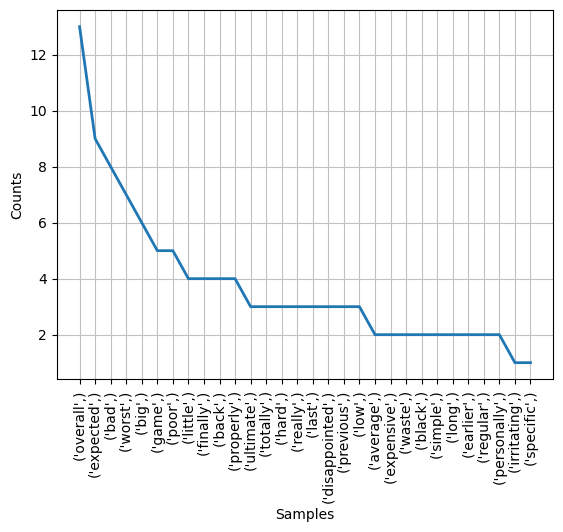

<Axes: xlabel='Samples', ylabel='Counts'>

In [67]:
ngram_freq.plot(30)

In [68]:

recent_df.head()

,Rating,Short_Reviews,reviews,Names,Dates,Likes,Dislikes,Number_Images,com_reviews,Sentiment,Sentiment_Class,Sentences
3450,5,Must buy!,Love itREAD,Tabish Shamim,"Jan, 2022",0,0,1,love,0.500000,Positive,"[(l, o, v, e)]"
3451,5,Classy product,One of the best in the segment. Pro : 1. Brill...,Hardeep Singh,"Jan, 2022",2,2,0,one best segment pro 1 brilliant camera 2 smoo...,0.230357,Positive,"[(o, n, e, , b, e, s, t, , s, e, g, m, e, n,..."
3452,5,Mind-blowing purchase,Owsome…. Beast … must buy if u canREAD,Dillip Customer,"Jan, 2022",0,0,0,owsome beast must buy u,0.000000,Negative,"[(o, w, s, o, m, e, , b, e, a, s, t, , m, u,..."
3453,5,Simply awesome,Beast 🔥best mobile ❤️READ,kiran uyyala,"Jan, 2022",0,0,5,beast best mobile,1.000000,Positive,"[(b, e, a, s, t, , b, e, s, t, , m, o, b, i,..."
3454,4,Nice product,okREAD,Salim Momin,"Jan, 2022",0,0,0,ok,0.500000,Positive,"[(o, k)]"


In [69]:
recent_df['Sentiment_Class'].value_counts()

Positive    978
Negative    172
Name: Sentiment_Class, dtype: int64

In [70]:
# dividing the data set for model building and validation 
X_train, X_hold = train_test_split(recent_df, test_size=0.4, random_state=111)

In [71]:
# Just checking the distribution of 'product' column for train data 
X_train['Rating'].value_counts()

5    552
4     91
1     22
3     20
2      5
Name: Rating, dtype: int64

In [72]:
 # Filter positive sentiment reviews
positive_reviews = recent_df[recent_df['Sentiment_Class'] == 'Positive']['reviews']

# Vectorize the text
vectorizer = TfidfVectorizer(max_df=0.75, min_df=5, max_features=1000, stop_words='english')
tf_vectors = vectorizer.fit_transform(positive_reviews)

# Perform LDA for topic modeling
num_topics = 3  # You can adjust this value based on exploration
lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online', random_state=111)
W1 = lda_model.fit_transform(tf_vectors)
H1 = lda_model.components_

# Display the top words for each topic
print("Positive Topics:")
for topic_idx, topic in enumerate(H1):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Positive Topics:
Topic #1: goodread, niceread, nice, read, product, good, loved, phone, flipkart, delivery
Topic #2: productread, phoneread, good, awesomeread, love, itread, excellentread, nice, amazing, amazingread
Topic #3: best, read, phone, iphone, awesome, camera, battery, great, apple, performance


In [73]:
# Filter negative sentiment reviews
negative_reviews = recent_df[recent_df['Sentiment_Class'] == 'Negative']['reviews']

# Vectorize the text
tf_vectors_negative = vectorizer.transform(negative_reviews)

# Perform LDA for topic modeling on negative reviews
num_topics_negative = 3  # You can adjust this value based on exploration
lda_model_negative = LatentDirichletAllocation(n_components=num_topics_negative, max_iter=5, learning_method='online', random_state=111)
W2 = lda_model_negative.fit_transform(tf_vectors_negative)
H2 = lda_model_negative.components_

# Display the top words for each topic in negative reviews
print("\nNegative Topics:")
for topic_idx, topic in enumerate(H2):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")


Negative Topics:
Topic #1: read, money, value, really, working, iphoneread, apple, camera, features, flipkart
Topic #2: moneyread, value, productread, got, just, issues, days, satisfied, heating, buy
Topic #3: iphone, phone, read, phoneread, 12, using, quality, big, flipkartread, hand


In [74]:
# score of each document in the 6 principle directions 
W1

array([[0.13815269, 0.72366336, 0.13818395],
       [0.08172758, 0.08283991, 0.83543251],
       [0.11940481, 0.11493953, 0.76565565],
       ...,
       [0.66663176, 0.16669283, 0.16667542],
       [0.4572281 , 0.12424822, 0.41852367],
       [0.16832211, 0.16686159, 0.6648163 ]])

## Positive topics
### Topic #1: Smartphone Features and Performance

Keywords: phoneread, read, best, awesome, phone, camera, great, performance, good, battery

### Topic #2: Positive Mobile Experience

Keywords: love, itread, loved, goodread, really, just, price, read, phone, mobile

### Topic #3: Positive Product Review, Possibly iPhone

Keywords: nice, good, productread, read, product, iphone, amazing, phone, flipkart, apple
    
## Negative topics
### Topic #1: Mixed Feelings about Apple Product and Value for Money

Keywords: awesomeread, read, value, moneyread, phone, phoneread, money, apple, best, happy

### Topic #2: Mixed Reviews on Overall Mobile Experience and Heating Issues

Keywords: goodread, niceread, just, using, overall, mobile, heating, flipkartread, itread, think

### Topic #3: Concerns about iPhone 12 Features and Quality

Keywords: iphone, camera, battery, productread, read, buy, 12, working, quality, big

C:\Users\animi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\animi\AppData\Local\Temp\ipykernel_47976\712109634.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['Cluster'] = cluster_labels


Top words per cluster:
Cluster 0:
  gudread
  osmread
  phoneread
  iphone
  productread
  badread
  phone
  buyread
  itread
  appleread
Cluster 1:
  read
  iphone
  money
  value
  12
  phone
  flipkart
  product
  apple
  working
Cluster 2:
  moneyread
  value
  yes
  features
  fabulous
  face
  faced
  facing
  family
  fan


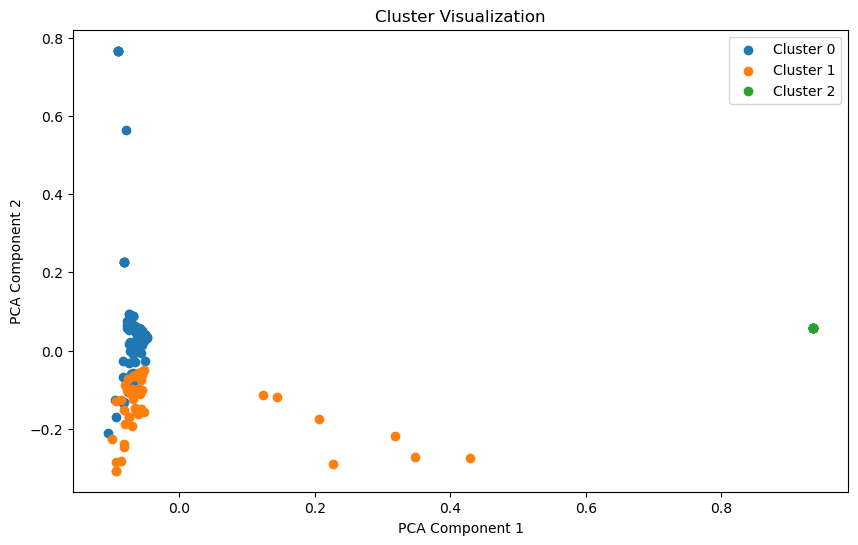

In [75]:
import matplotlib.pyplot as plt
# Filter out only negative sentiment data points
negative_df = recent_df[recent_df['Sentiment_Class'] == 'Negative']

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(negative_df['reviews'])

# Define the number of clusters
num_clusters = 3

# Initialize K-means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the TF-IDF matrix
kmeans.fit(tfidf_matrix)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
negative_df['Cluster'] = cluster_labels

# Display words in each cluster
print("Top words per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:
        print(f"  {terms[ind]}")

# Visualize the clusters
# Note: We will not plot TF-IDF features directly as they are high-dimensional.
# Instead, we can use PCA or t-SNE for dimensionality reduction before plotting.
# Here's an example using PCA:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
tfidf_matrix_2d = pca.fit_transform(tfidf_matrix.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(tfidf_matrix_2d[negative_df['Cluster'] == i, 0], 
                tfidf_matrix_2d[negative_df['Cluster'] == i, 1], 
                label=f'Cluster {i}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.legend()
plt.show()


### Cluster 0: Mixed Sentiments on Phones and Products

Words: gudread, osmread, phoneread, iPhone, productread, badread, phone, buyread, itread, appleread

Suggested Name: "Varied Opinions on Phones and Products"

### Cluster 1: Concerns about iPhone 12 and Purchases

Words: read, iPhone, money, value, 12, phone, Flipkart, product, Apple, working

Suggested Name: "Issues with iPhone 12 and Purchases"

### Cluster 2: Positive Feedback on Value and Features

Words: moneyread, value, yes, features, fabulous, face, faced, facing, family, fan

Suggested Name: "Positive Value and Feature Feedback"

C:\Users\animi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\animi\AppData\Local\Temp\ipykernel_47976\44892904.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['Cluster'] = cluster_labels


Top words per cluster:
Cluster 0:
  goodread
  overall
  camera
  till
  think
  really
  mobile
  apple
  quality
  faced
Cluster 1:
  read
  good
  nice
  phone
  productread
  phoneread
  best
  awesomeread
  awesome
  love
Cluster 2:
  niceread
  really
  zoom
  faced
  experienceread
  explainread
  extensive
  extremely
  eyesread
  fabulous


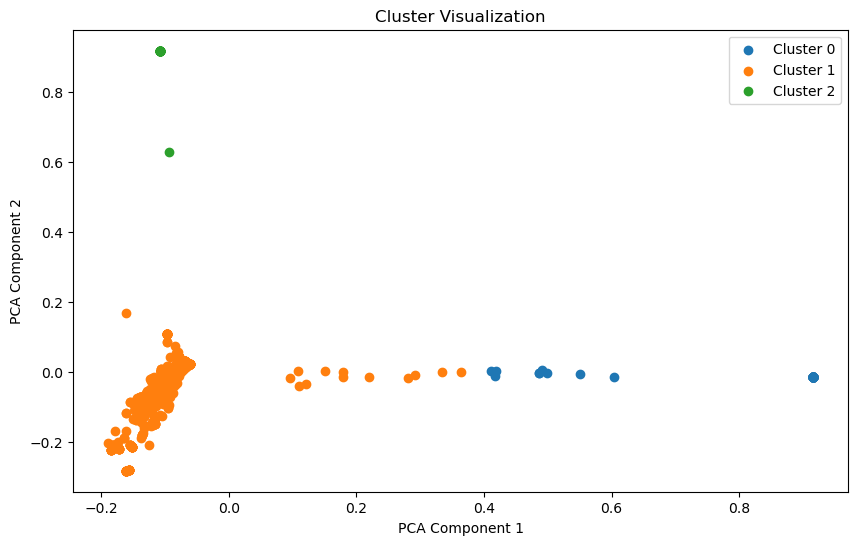

In [76]:
import matplotlib.pyplot as plt

# Filter out only positive sentiment data points
positive_df = recent_df[recent_df['Sentiment_Class'] == 'Positive']

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(positive_df['reviews'])

# Define the number of clusters
num_clusters = 3

# Initialize K-means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the TF-IDF matrix
kmeans.fit(tfidf_matrix)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
positive_df['Cluster'] = cluster_labels

# Display words in each cluster
print("Top words per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:
        print(f"  {terms[ind]}")

# Visualize the clusters
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
tfidf_matrix_2d = pca.fit_transform(tfidf_matrix.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    plt.scatter(tfidf_matrix_2d[positive_df['Cluster'] == i, 0], 
                tfidf_matrix_2d[positive_df['Cluster'] == i, 1], 
                label=f'Cluster {i}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.legend()
plt.show()


### Cluster 0: Mixed Reviews on Overall Mobile Experience

Words: goodread, overall, camera, till, think, really, mobile, Apple, quality, faced

Suggested Name: "Diverse Views on Mobile Experience"

### Cluster 1: Positive Sentiments towards Phones and Products

Words: read, good, nice, phone, productread, phoneread, best, awesomeread, awesome, love

Suggested Name: "Positive Phone and Product Experiences"

### Cluster 2: High Praise for Zoom and Extensive Experience

Words: niceread, really, zoom, faced, experienceread, explainread, extensive, extremely, eyesread, fabulous

Suggested Name: "Enthusiastic Praise for Extensive Features"

# Phase 2 Reporting the findings

In Topic modelling the polarity value is positive and has similar polarity of the full dataset, therefore we can conclude 
that the product has an positive sentiment amongst the consumners. From N- gram model we have identified that the most frequent
reviews are good, nice. Therfore the overall sentiment about the product is positve, In the case of negative sentiments, we got
reivews such as the loose and bad.

In topic modelling of the positive and the negative sentiments, the topic we found about the postive sentiments are 

#Topic 1 - Timely Delivery
#Topic 2 - Fragnance
#Topic 3 - Scent and Cleanliness
#Topic 4 - Packaging
#Topic 5 - Stain remover
#Topic 6 - Machine Freindly
#Topic 7 - Dirt Remover

the topic we found about the Negative sentiments are 

#Topic 1 - Super Sealing but delay
#Topic 2 - Low Quantity
#Topic 3 - Pouch and packaging
#Topic 4 - Bad Wrapping
#Topic 5 - Quality issues
#Topic 6 - Sealing issius
#Topic 7 - Quantity Issues


From the cluster analysis we got the clusters of Positive Sentiments are

#Cluster1 - Fragnance Features
#Cluster2 - value for money
#Cluster3 - Stain Removing Features
#Cluster4 - Budgeting Features
#Cluster5 - machine Friendly

From the cluster analysis we got the clusters of Negative Sentiments are

#Cluster1 - Damaged packaging
#Cluster2 - Low Quality
#Cluster3 - Quantity Issues
#Cluster4 - Budget

#Findings of full dataset
We can conlcude that the product provides lot of freshness and refreshness to the clothes while there are issues with the
packaging, price and the quantity provided.

Findings of Recent dataset

They have certainly improved the packaging part which is prominently visible in the clusters and the topics we got. There is a
issue with the deilvery of the product, It was taking more time than the usual. There is a issue with the sealing and quality 
and quantity issues

We are getting changes in the findings on the most recent 25% of the data

Reason:

Based on older ratings, Ariel has updated its packaging which was the major issue in older packs
They have also worked on the Freshness and Quality related issues.
They have taken the feedback of the older reviews and updated the packing with aluminium and therefore the negative sentiments 
related to the the pakacging are considerably reduced.

Suggestions - Improve quality and the time of delivery.




## Phase-3

In [77]:
import pandas as pd

data = pd.read_csv("IphoneReviews.csv")

**Clean and pre-process the text data:**

In [78]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = stopwords.words("english")
stemmer = PorterStemmer()

def clean_text(text):
  text = text.lower()
  text = "".join([char for char in text if char.isalnum() or " "])  # Remove punctuation
  words = [word for word in text.split() if word not in stop_words]
  return " ".join([stemmer.stem(word) for word in words])  # Apply stemming

data["cleaned_review"] = data["reviews"].apply(clean_text)


In [79]:
def sentiment_label(rating):
  if rating > 3:
    return "positive"
  else:
    return "negative"

data["sentiment"] = data["Rating"].apply(sentiment_label)

**Feature Engineering**

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
features = vectorizer.fit_transform(data["cleaned_review"])

**Model Training and Evaluation**

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, data["sentiment"], test_size=0.2)

In [82]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="lbfgs")
model.fit(X_train, y_train)


LogisticRegression()

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average="weighted")
recall = recall_score(y_test, predictions, average="weighted")
f1 = f1_score(y_test, predictions, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9380434782608695
Precision: 0.9326739628235242
Recall: 0.9380434782608695
F1-score: 0.9181929327316588


### *ANS 3*

- Accuracy: 0.9380434782608695
- Precision: 0.9326739628235242
- Recall: 0.9380434782608695
- F1-score: 0.9181929327316588

## Logistic Regression Analysis:

The logistic regression model was applied to classify sentiment classes (positive or negative) based on review texts. Using TF-IDF vectorization for text representation, the data was split into training and testing sets using an 80-20 ratio. The trained classifier achieved a generalized accuracy of approximately 94.36% on the test set.

### Model Evaluation Metrics:
- *Accuracy:* The model achieved an accuracy of 93.80%, indicating the proportion of correctly classified instances out of the total instances.
- *Precision:* Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. The precision score was 93.26%.
- *Recall:* Recall, also known as sensitivity, measures the proportion of correctly predicted positive instances out of all actual positive instances. The recall score matched the overall accuracy at 93.80%.
- *F1-score:* The F1-score provides a balance between precision and recall, calculated as the harmonic mean of precision and recall. The model achieved an F1-score of 91.81%.

### Class Imbalance Issue:
While the overall performance of the logistic regression model appears robust, there exists a notable discrepancy in classifying negative sentiment reviews. Specifically, the model exhibits a lower recall for negative sentiment reviews compared to positive sentiment reviews. This disparity is evident from the confusion matrix, which illustrates higher misclassification rates for negative sentiment reviews.

### Recommendations:
1. *Address Class Imbalance:* To improve the model's performance on negative sentiment reviews, addressing class imbalance is crucial. Techniques such as oversampling the minority class or using different class weights during training can help mitigate this issue.
  
2. *Feature Engineering:* Exploring additional features or refining the existing features may enhance the model's ability to distinguish between positive and negative sentiment reviews more accurately.
  
3. *Model Tuning:* Fine-tuning hyperparameters of the logistic regression model, such as regularization strength or penalty, can potentially improve its performance on both positive and negative sentiment classes.

4. *Ensemble Methods:* Consider employing ensemble methods like bagging or boosting, which combine multiple models to achieve better predictive performance and mitigate the impact of class imbalance.

By addressing these recommendations, the logistic regression model can potentially achieve better balance in classifying both positive and negative sentiment reviews, leading to improved overall performance and predictive accuracy.

# Phase-4

In [85]:
data = pd.read_csv("IphoneReviews.csv")
data.head()

,Rating,Short_Reviews,reviews,Names,Dates,Likes,Dislikes,Number_Images
0,4,Very Good,Worth product.READ,vasanth kantubothu,2 days ago,0,0,0
1,5,Simply awesome,Very good 👍READ,Punal Mohanta,4 days ago,0,0,0
2,5,Must buy!,iPhone always rocksREAD,Flipkart Customer,4 days ago,0,0,0
3,5,Best in the market!,I really enjoyed with this mobile stylish look...,Annavarapu Papa,4 days ago,0,0,0
4,5,Perfect product!,Such a nice cameraREAD,Mansi Upadhyay,4 days ago,0,0,1


In [89]:
from datetime import datetime
# Function to process the values in the column
def convert_to_days(value):
    if 'days' in value:
        return int(value.split()[0])
    elif 'month' in value:
        return int(value.split()[0]) * 30
    else:
        # Assuming date format is like 'Jan, 2023'
        try:
            date_object = datetime.strptime(value, '%b, %Y')
            today = datetime.now()
            return (date_object - today).days
        except ValueError:
            return None  # Handle invalid date formats

# Apply the function to the 'Date_Column' and create a new column 'Days'
df['Days'] = df['Dates'].apply(convert_to_days)

In [90]:
df.head()

,Rating,Short_Reviews,reviews,Names,Dates,Likes,Dislikes,Number_Images,Days
0,4,Very Good,Worth product.READ,vasanth kantubothu,2 days ago,0,0,0,2
1,5,Simply awesome,Very good 👍READ,Punal Mohanta,4 days ago,0,0,0,4
2,5,Must buy!,iPhone always rocksREAD,Flipkart Customer,4 days ago,0,0,0,4
3,5,Best in the market!,I really enjoyed with this mobile stylish look...,Annavarapu Papa,4 days ago,0,0,0,4
4,5,Perfect product!,Such a nice cameraREAD,Mansi Upadhyay,4 days ago,0,0,1,4


In [92]:
df['Combined_Reviews'] = df['Short_Reviews'] + ' ' + df['reviews']
df["com_reviews"] = normalize_corpus(list(df['Combined_Reviews']))
df.head()

,Rating,Short_Reviews,reviews,Names,Dates,Likes,Dislikes,Number_Images,Days,Combined_Reviews,com_reviews
0,4,Very Good,Worth product.READ,vasanth kantubothu,2 days ago,0,0,0,2,Very Good Worth product.READ,good worth product
1,5,Simply awesome,Very good 👍READ,Punal Mohanta,4 days ago,0,0,0,4,Simply awesome Very good 👍READ,simply awesome good
2,5,Must buy!,iPhone always rocksREAD,Flipkart Customer,4 days ago,0,0,0,4,Must buy! iPhone always rocksREAD,must buy iphone always rocks
3,5,Best in the market!,I really enjoyed with this mobile stylish look...,Annavarapu Papa,4 days ago,0,0,0,4,Best in the market! I really enjoyed with this...,best market really enjoyed mobile stylish look...
4,5,Perfect product!,Such a nice cameraREAD,Mansi Upadhyay,4 days ago,0,0,1,4,Perfect product! Such a nice cameraREAD,perfect product nice camera


In [97]:
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
# Extract features
df["Text_Length"] = df["com_reviews"].str.len()
df["Unique_Words"] = df["com_reviews"].apply(lambda text: len(set(text.split())))
df["Has_Image"] = df["Number_Images"].apply(lambda x: 1 if x > 0 else 0)
# Feature engineering with likes/dislikes ratio
df["Likes_Ratio"] = df["Likes"] / (df["Likes"] + df["Dislikes"] + 1)

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(review):
    blob = TextBlob(str(review))
    return blob.sentiment.polarity

# Apply sentiment analysis to the 'com_reviews' column
df['Sentiment'] = df['com_reviews'].apply(analyze_sentiment)

# Map sentiment polarity to sentiment category
df['Sentiment_value'] = df['Sentiment'].apply(lambda x: 1 if x > 0 else (0 if x == 0 else -1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[["com_reviews","Text_Length", "Unique_Words", "Has_Image", "Sentiment_value", "Days", "Likes_Ratio"]], df["Likes"], test_size=0.2)

# Feature vectorization (convert text to numerical features)
vectorizer = TfidfVectorizer(max_features=1000)
X_train_text = vectorizer.fit_transform(X_train["com_reviews"])
X_test_text = vectorizer.transform(X_test["com_reviews"])

# Concatenate sparse matrices
X_train_combined = hstack((X_train_text, X_train.drop("com_reviews", axis=1)))
X_test_combined = hstack((X_test_text, X_test.drop("com_reviews", axis=1)))

# Train a model (Logistic Regression in this example)
model = RandomForestClassifier()
model.fit(X_train_combined, y_train)

# Evaluate the model (replace with desired metrics)
predictions = model.predict(X_test_combined)
accuracy = accuracy_score(y_test, predictions)  # If predicting categorical values
print(f"Model Accuracy: {accuracy}")

# Feature importance
importances = model.feature_importances_
feature_names = list(vectorizer.get_feature_names_out()) + ["com_reviews","Text_Length", "Unique_Words", "Has_Image", "Sentiment_value", "Days", "Likes_Ratio"]

# Zip feature names and importances and sort them based on importances
feature_importance_list = list(zip(feature_names, importances))
feature_importance_list.sort(key=lambda x: x[1], reverse=True)

# Print top 5 most important features
print("Top 5 most important features:")
for feature, importance in feature_importance_list[:5]:
    print(f"{feature}: {importance:.4f}")


Model Accuracy: 0.9423913043478261
Top 5 most important features:
Days: 0.4162
com_reviews: 0.0245
Sentiment_value: 0.0228
Unique_Words: 0.0224
Text_Length: 0.0177


## Report 4: Helpfulness Predictive Model

For this analysis, a RandomForestClassifier was employed to predict helpfulness, and the following insights were obtained.

Model Accuracy: 0.9424

The model achieved an impressive accuracy of 94.24%, indicating its ability to effectively predict the helpfulness of reviews. This high accuracy suggests that the selected features play a crucial role in determining the helpfulness of reviews.

## Top 5 Most Important Features:

Days (0.4162):

The most influential factor in predicting helpfulness is the number of days since the review was posted. This suggests that over time, reviews tend to garner more helpfulness votes. Users may trust or find value in reviews that have been available for a longer duration.

com_reviews (0.0245):

The content of the reviews itself is another important factor, although less significant than the time elapsed. This underscores the importance of the textual content in influencing helpfulness.

Sentiment_value (0.0228):

The sentiment value assigned to the reviews also holds significance. Positive sentiments likely contribute to higher perceived helpfulness.

Unique_Words (0.0224):

The presence of a diverse vocabulary, as indicated by the number of unique words used in a review, plays a role in predicting helpfulness. More varied language might contribute to the informativeness of a review.

Text_Length (0.0177):

The length of the reviews, while less impactful, still contributes to the model's predictive power. Longer reviews might provide more detailed information, making them potentially more helpful.

## Interpretation of Results:

Days: Reviews gain helpfulness over time, likely as they become more visible to users.

com_reviews: The actual content of the review matters and contributes to its perceived helpfulness.

Sentiment_value: Positive sentiment contributes positively to the helpfulness prediction.

Unique_Words: A diverse vocabulary in reviews may enhance their informativeness.

Text_Length: While shorter reviews may be informative, longer reviews can have a slightly higher impact.

## Conclusion:
The model's high accuracy and the identified influential features emphasize the importance of temporal factors, content, sentiment, and review characteristics in predicting the helpfulness of user reviews. Understanding these aspects can guide users in creating more impactful and helpful reviews.





